In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
device = 'cpu'

In [2]:
def get_data(n=10, p=10000):
    np.random.seed(seed=13)
    
    # data
    X = np.random.randn(n, p)
    # X_test = np.random.randn(n, p)

    Y = X[:, 0] # + 3 * X[:, 1] # + 0.5 * np.random.randn(n)
    # Y_test = 2 * X_test[:, 0] + 3 * X_test[:, 1] # + 0.5 * np.random.randn(n)

    X = torch.Tensor(X).to(device)
    Y = torch.Tensor(Y).reshape(-1, 1).to(device)
#     print(X.shape, Y.shape)
    return X, Y

In [3]:
def train_linear(X, Y, num_epochs=int(1e4), lr=1e-4, lambda_ridge=0): 
    input_size = X.shape[1]

    # linear model
    model = nn.Linear(input_size, 1).to(device)
    model.weight.data = 0 * model.weight.data

    # Loss and optimizer
    criterion = nn.MSELoss() # nn.CrossEntropyLoss()  
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)  
    # optimizer = torch.optim.Adam(model.parameters(), lr=lr)  

    # Train the model
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X)
        loss = criterion(outputs, Y) + lambda_ridge * model.weight.norm()

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
            
        if loss.item() <= 1e-5:
            print (f'\tEpoch: {epoch}, Loss: {loss.item():.4f}, \
                    norm: {model.weight.norm()}')  
            return model
            
    return model

ws = []
lambdas = [0, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
for lambda_ridge in lambdas:
    X, Y = get_data(n=10, p=int(1e2))
    model = train_linear(X, Y, num_epochs = int(6e3), lr=1e-5, lambda_ridge=lambda_ridge)
    w = model.weight.detach().cpu().numpy()[0]
    ws.append(w)
    wnorm = np.linalg.norm(w)
    wunit = w / wnorm
    print(f'lambda={lambda_ridge}, w0={wunit[0]}, wnorm={wnorm}')

lambda=0, w0=0.30813801288604736, wnorm=0.2097076177597046
lambda=0.001, w0=0.30792468786239624, wnorm=0.21024814248085022
lambda=0.01, w0=0.3083202540874481, wnorm=0.20880873501300812
lambda=0.1, w0=0.30890244245529175, wnorm=0.20259369909763336
lambda=1.0, w0=0.3080512285232544, wnorm=0.17358596622943878
lambda=10.0, w0=0.30353474617004395, wnorm=7.402387564070523e-05


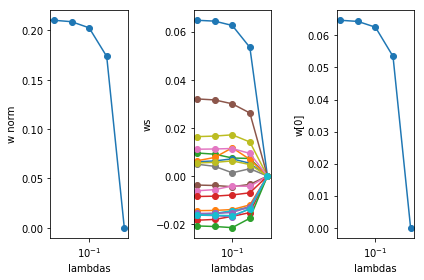

In [5]:
norms = [np.linalg.norm(w) for w in ws]
w0s = [w[0] for w in ws]
R, C = 1, 3
plt.subplot(R, C, 1)
plt.xlabel('lambdas')
plt.ylabel('w norm')
plt.semilogx(lambdas, norms, 'o-')

plt.subplot(R, C, 2)
plt.xlabel('lambdas')
plt.ylabel('ws')
for i in range(20):
    plt.semilogx(lambdas, [w[i] for w in ws], 'o-')

plt.subplot(R, C, 3)
plt.xlabel('lambdas')
plt.ylabel('w[0]')
plt.semilogx(lambdas, w0s, 'o-')

plt.tight_layout()
plt.show()
# plt.plot(w0s)

In [120]:
# plt.plot(outputs.detach().cpu().numpy(), Y.detach().cpu().numpy(), 'o')
# plt.xlabel('pred')
# plt.ylabel('lab')
# plt.show()

[0.054 0.083] 0.35836294


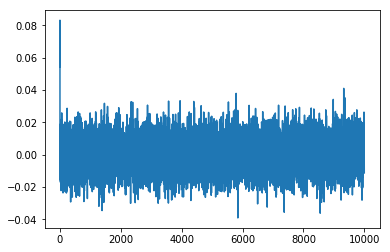

In [121]:
# plt.plot(wunit)
# plt.show()

In [ ]:
# p=10000, 0.054, 0.03, 